#Introduction




In [ ]:
#Program Name:
#Non-linear Systems of Equations

#Date       Programmer      Version Number
#--------   -------------   ---------------
#04/06/23   J. S. Prieto    Version 1

### Non-linear System of Equations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [ ]:
def eq1(x1,x2):
  return 3*x1**3 + 4*x2**2 -145

In [ ]:
def eq2(x1,x2):
  return 4*x1**2 -x2**3 +28

In [ ]:
# Generate x1 and x2 values based on what you think is reasonable
x1val = np.arange(-10,10.5,0.1,)
print(len(x1val))
x2val = np.arange(-10,10.5,0.1,)
print(len(x2val))

205
205


In [ ]:
#Since we have 41 values in the x1 dimension (axis) and 41 values in the x2 dimension, we will have 41*41 = 1681 values
#as pairs when we consider (x1,x2) pairs.
#We thus need 1681 variable spaces for storing the result of the evaluation of eq1(x1,x2)
#Let's declare a 2d array that can hold 41 by 41
f1soln = np.full((205,205), -999.9)

In [ ]:
#Now let's generate these values for eq1
for i in range(len(x1val)):
  for j in range(len(x2val)):
    f1soln[i,j] = eq1(x1val[i],x2val[j])

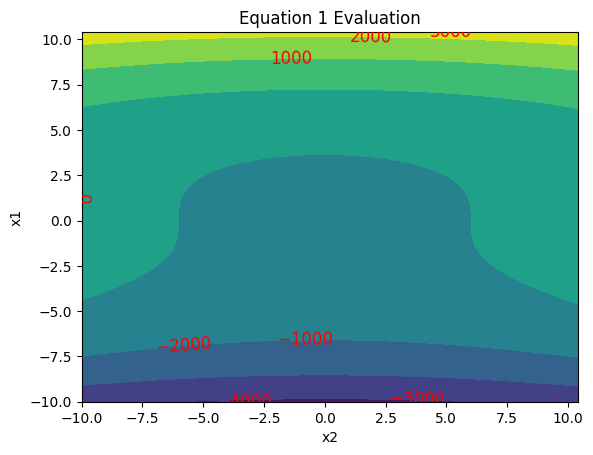

In [ ]:
#Now let's plot the result of the evaluation of eq1 over the x1 and x2 domain we have chosen and see what it looks like
#In order to visualize it, we need a contour plot (so we can see the result on the 'z' axis)



fig, ax = plt.subplots()
x_, y_ = np.meshgrid(x1val, x2val) #optional
cs = plt.contourf(x_,y_,f1soln) #solid contour and levels countour
# adding labels to the line contours
ax.clabel(cs, inline=1, fontsize=12, colors = 'r' )
ax.set_title('Equation 1 Evaluation')
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()



Let's do the same for equation 2

In [ ]:
f2soln = np.full((205,205), -999.9) #declare a new variable for storunf eq2 values
for i in range(len(x1val)):
  for j in range(len(x2val)):
    f2soln[i,j] = eq2(x1val[i],x2val[j])


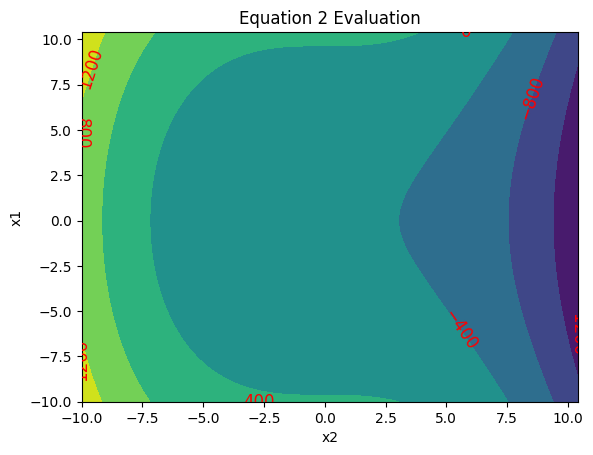

In [ ]:

fig, ax2 = plt.subplots()
cs2 = plt.contourf(x1val,x2val,f2soln)
# adding labels to the line contours
ax2.clabel(cs2, inline=1, fontsize=12, colors = 'r' )
ax2.set_title('Equation 2 Evaluation')
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()


Now let's combine the two solution spaces. There are many ways of doing this but one easy way is to take the absolute value of the two equation evaluations and add them. Then we will plot the combonied equation evaluation.

In [ ]:
fcombined =np.sqrt(f1soln**2 + f2soln**2)

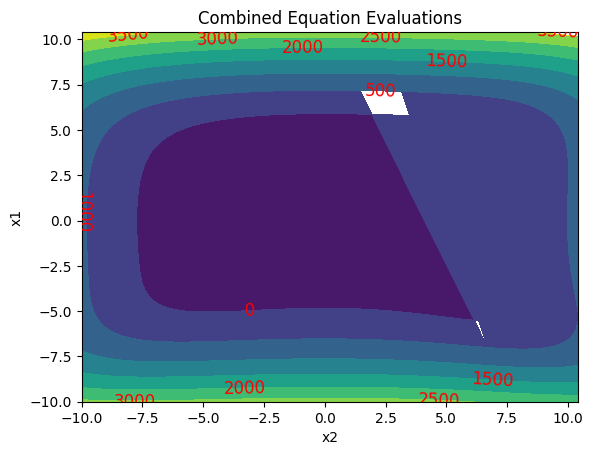

In [ ]:

fig, axc = plt.subplots()
csc = plt.contourf(x1val,x2val,fcombined)
# adding labels to the line contours
axc.clabel(csc, inline=1, fontsize=12, colors = 'r')
axc.set_title('Combined Equation Evaluations')
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

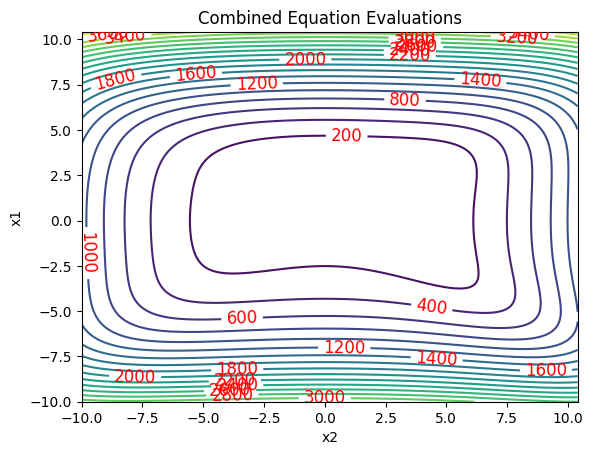

In [ ]:
fig, ax = plt.subplots()
x_, y_ = np.meshgrid(x1val, x2val)
cs = plt.contour(x_,y_,fcombined, 20)
ax.clabel(cs, inline=1, fontsize=12, colors = 'r')
ax.set_title('Combined Equation Evaluations')
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

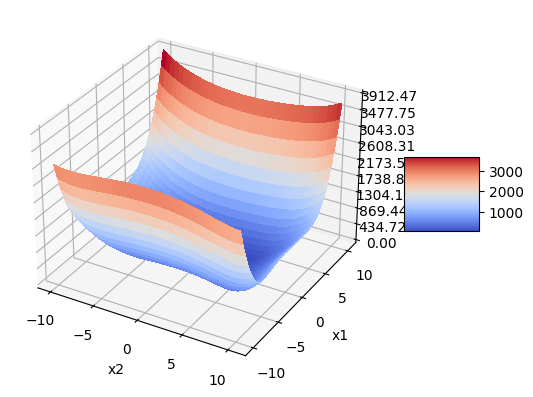

In [ ]:
#https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(x_, y_, fcombined, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# # Customize the z axis.
# ax.set_zlim(-0.5, 50)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=1)
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

### Now le'ts solve it Mathematically Using the SciPy library

In [ ]:
import scipy


In [ ]:
from scipy.optimize import fsolve
from math import exp

def equations(vars):
    x1, x2 = vars
    res1 = eq1(x1,x2)
    res2 = eq2 (x1,x2)
    return [res1, res2]

x1res, x2res =  fsolve(equations, (1, 1))

print(x1res, x2res)

3.000000000000201 3.9999999999991367


In [ ]:
print(eq1(2.0, 8.0))

135.0


In [ ]:
print(eq2(2.0, 8.0))

-468.0
